# Dimensionality Reduction Techniques on MNIST & IRIS Datasets


## PCA • t-SNE • UMAP — Visualization and Analysis

# **Author**

## ***BHUVANESH*** ***S***
### Pre Final Year CSE Student
### Sri Sivasubramaniya Nadar College of Engineering

### This notebook demonstrates how to apply dimensionality reduction techniques on two popular machine learning datasets:

# 1️ MNIST Dataset (Handwritten Digits)

Contains 60,000 training and 10,000 testing images

Each image has 784 features (28×28 pixels)

# Techniques applied:

Manual PCA (using covariance & eigen decomposition)

Sklearn PCA

t-SNE (for non-linear, high-quality visualization)

#2 Iris Dataset

A classic dataset containing measurements of:

Sepal length

Sepal width

Petal length

Petal width

# Techniques applied:

PCA (2D projection)

t-SNE (non-linear mapping)

UMAP (Uniform Manifold Approximation and Projection)

# Dimentionality Reduction of MNIST Dataset using PCA form Scratch in Python

In [57]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


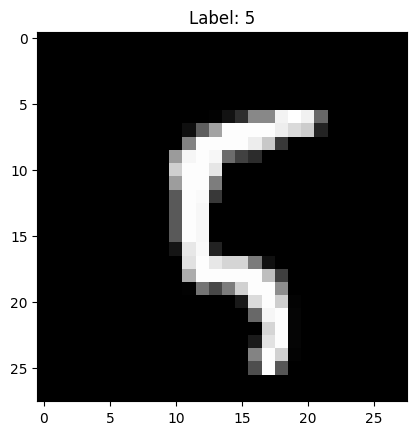

In [64]:
import matplotlib.pyplot as plt

plt.imshow(x_train[100], cmap='gray')
plt.title(f"Label: {y_train[100]}")
plt.show()


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x_train = x_train.reshape(x_train.shape[0], -1)

d0 = pd.DataFrame(x_train)
d0.insert(0, "label", y_train)

# Separate labels and data
l = d0['label']
d = d0.drop("label", axis=1)

print(d.shape)
print(l.shape)


(60000, 784)
(60000,)


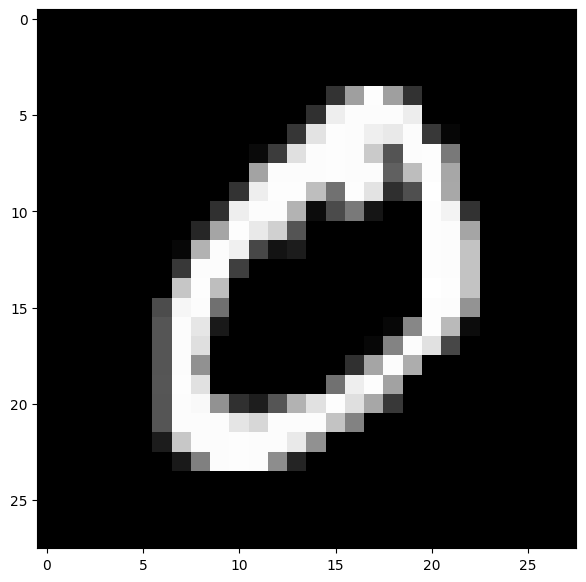

0


In [14]:

# Display any number
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation="none", cmap="gray")
plt.show()

print(l[idx])

In [15]:
labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [17]:
# Standardize
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

sample_data = standardized_data

(15000, 784)


In [21]:
from scipy.linalg import eigh


# Covariance matrix (A^T * A)
covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [23]:

# top 2 eigenvalues (782, 783)
values, vectors = eigh(covar_matrix, subset_by_index=(782,783))
print("Shape of eigen vectors = ", vectors.shape)

Shape of eigen vectors =  (784, 2)


In [24]:

# transpose to (2, 784)
vectors = vectors.T
print("Updated shape of eigen vectors = ", vectors.shape)

Updated shape of eigen vectors =  (2, 784)


In [25]:
# Project to PCA space
new_coordinates = np.matmul(vectors, sample_data.T)
print("resultant new data points shape =", new_coordinates.shape)



resultant new data points shape = (2, 15000)


In [26]:

# Append labels
new_coordinates = np.vstack((new_coordinates, labels)).T

# Create dataframe
dataframe = pd.DataFrame(
    data=new_coordinates,
    columns=("2nd_principal","1st_principal","label")
)
print(dataframe.head())

   2nd_principal  1st_principal  label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


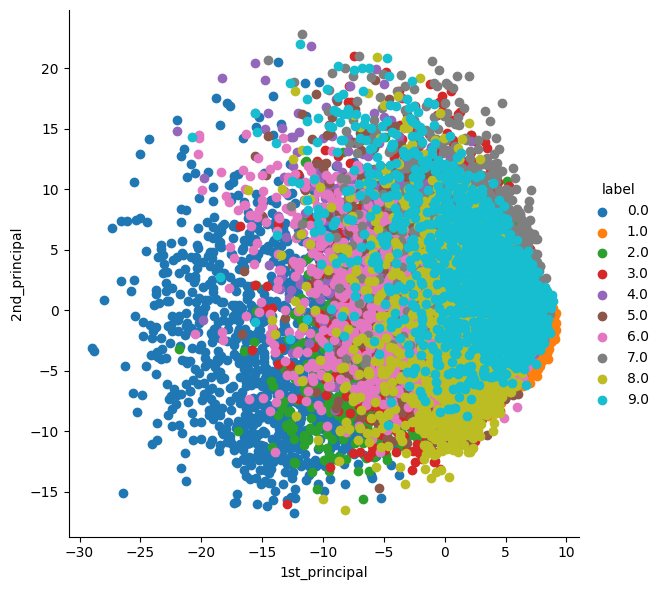

In [28]:

# Plot
import seaborn as sn
import struct
sn.FacetGrid(dataframe, hue="label", height=6).map(
    plt.scatter, '1st_principal', '2nd_principal'
).add_legend()

plt.show()

# PCA Using ScikitLearn



(15000, 784)
shape of pca_data =  (15000, 2)


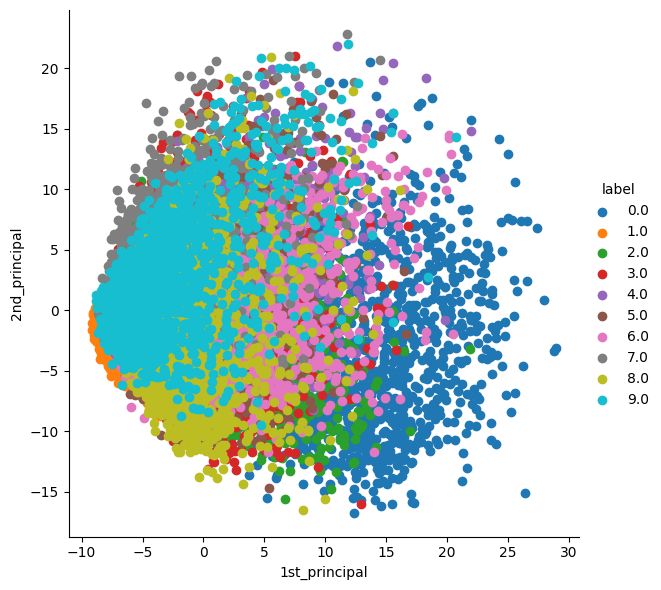

In [51]:

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

x_train = x_train.reshape(x_train.shape[0], -1)

d0 = pd.DataFrame(x_train)
d0.insert(0, "label", y_train)

# Separate labels and data
l = d0['label']
d = d0.drop("label", axis=1)
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

sample_data = standardized_data
# initialize PCA
pca = decomposition.PCA(n_components=2)

# fit and transform the standardized data
pca_data = pca.fit_transform(sample_data)

print("shape of pca_data = ", pca_data.shape)   # should be (15000, 2)

# attach labels (same as manual PCA section)
pca_data = np.vstack((pca_data.T, labels)).T

# create dataframe for plotting
pca_df = pd.DataFrame(
    data=pca_data,
    columns=("1st_principal", "2nd_principal", "label")
)

# plot using seaborn
sn.FacetGrid(pca_df, hue="label", height=6) \
  .map(plt.scatter, '1st_principal', '2nd_principal') \
  .add_legend()

plt.show()


# Conclusion :

## The best number of principal components (n) is the smallest k for which the cumulative explained variance crosses 90%. In the visualization, this is the intersection of the blue curve and the red threshold line. The green vertical line marks this value.”

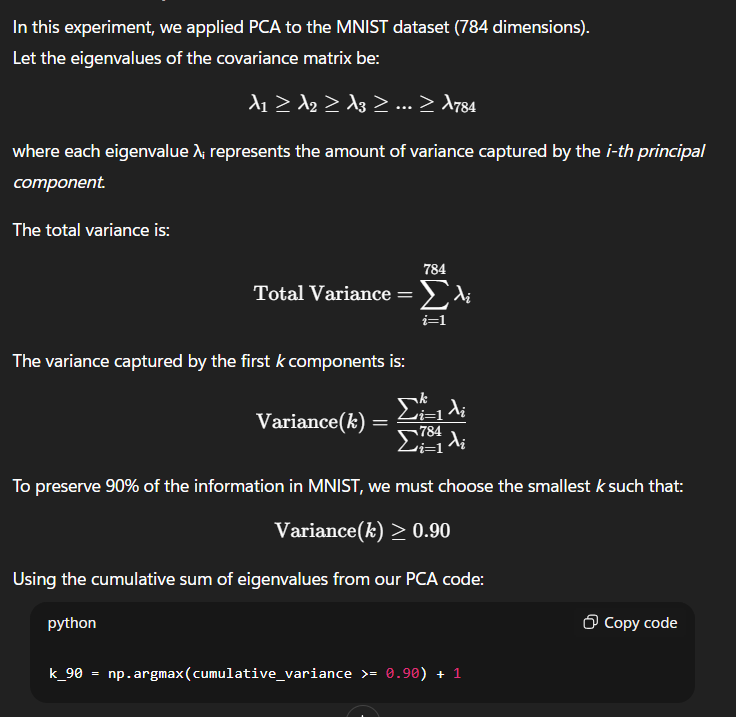


In [48]:
# compute ALL eigenvalues and eigenvectors
all_values, all_vectors = eigh(covar_matrix)

# eigh returns ascending → reverse them
all_values = all_values[::-1]

total_variance = np.sum(all_values)
cumulative_variance = np.cumsum(all_values) / total_variance

# find k for 90% variance
k_90 = np.argmax(cumulative_variance >= 0.90) + 1
print("Number of components capturing 90% variance =", k_90)


Number of components capturing 90% variance = 208


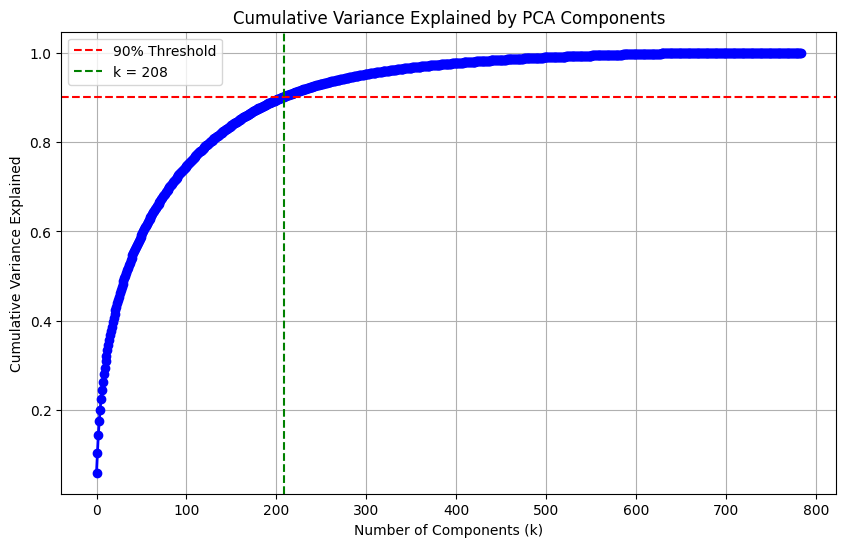

In [50]:
plt.figure(figsize=(10,6))
plt.plot(cumulative_variance, marker='o', linewidth=2, color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Threshold')
plt.axvline(x=k_90, color='green', linestyle='--', label=f'k = {k_90}')

plt.title("Cumulative Variance Explained by PCA Components")
plt.xlabel("Number of Components (k)")
plt.ylabel("Cumulative Variance Explained")
plt.legend()
plt.grid(True)
plt.show()


# t-SNE Visualization for the MNIST DataSet


Shape of selected data for t-SNE: (1000, 784)
Starting t-SNE computations...
Shape of t-SNE result: (1000, 2)


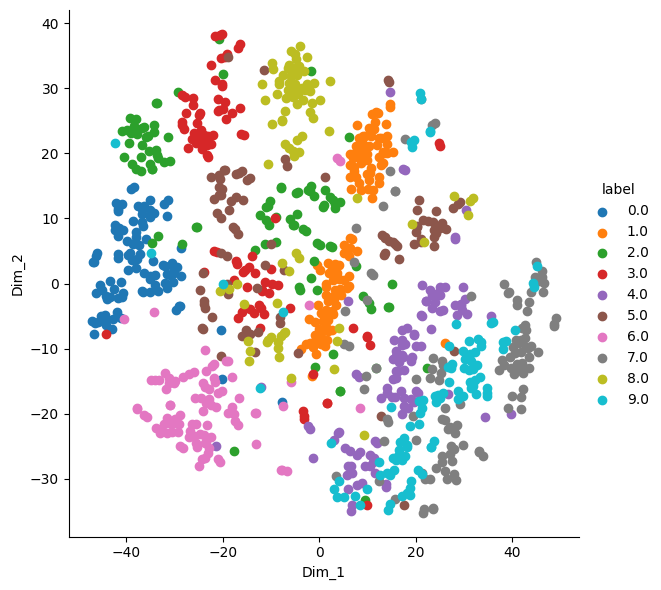

In [30]:


from sklearn.manifold import TSNE

# Pick top 1000 points (TSNE is slow for large data)
data_1000 = sample_data[0:1000, :]   # use the already standardized data
labels_1000 = labels[0:1000]

print("Shape of selected data for t-SNE:", data_1000.shape)

# initialize t-SNE (2 components)
tsne = TSNE(n_components=2, random_state=0)

print("Starting t-SNE computations...")
tsne_result = tsne.fit_transform(data_1000)

print("Shape of t-SNE result:", tsne_result.shape)

# append labels (same method as manual PCA)
tsne_result = np.vstack((tsne_result.T, labels_1000)).T

# create dataframe for plotting
tsne_df = pd.DataFrame(
    data=tsne_result,
    columns=("Dim_1", "Dim_2", "label")
)

# plot with seaborn
sn.FacetGrid(tsne_df, hue="label", height=6) \
  .map(plt.scatter, 'Dim_1', 'Dim_2') \
  .add_legend()

plt.show()


Starting t-SNE computations...
Shape of t-SNE result: (1000, 2)


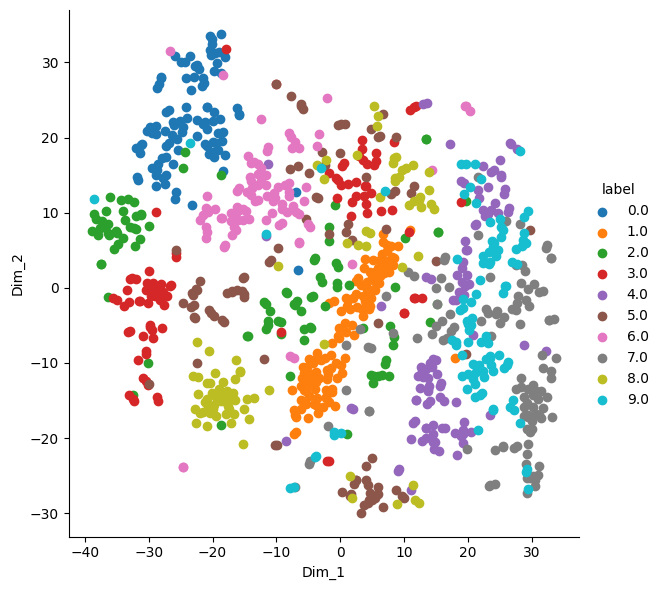

In [47]:
tsne = TSNE(
    n_components=2,
    perplexity=40,

    learning_rate='auto',
    init='pca',
    random_state=0
)


print("Starting t-SNE computations...")
tsne_result = tsne.fit_transform(data_1000)

print("Shape of t-SNE result:", tsne_result.shape)

# append labels (same method as manual PCA)
tsne_result = np.vstack((tsne_result.T, labels_1000)).T

# create dataframe for plotting
tsne_df = pd.DataFrame(
    data=tsne_result,
    columns=("Dim_1", "Dim_2", "label")
)

# plot with seaborn
sn.FacetGrid(tsne_df, hue="label", height=6) \
  .map(plt.scatter, 'Dim_1', 'Dim_2') \
  .add_legend()

plt.show()


# Dimentionality Reduction of IRIS using PCA


In [34]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show()

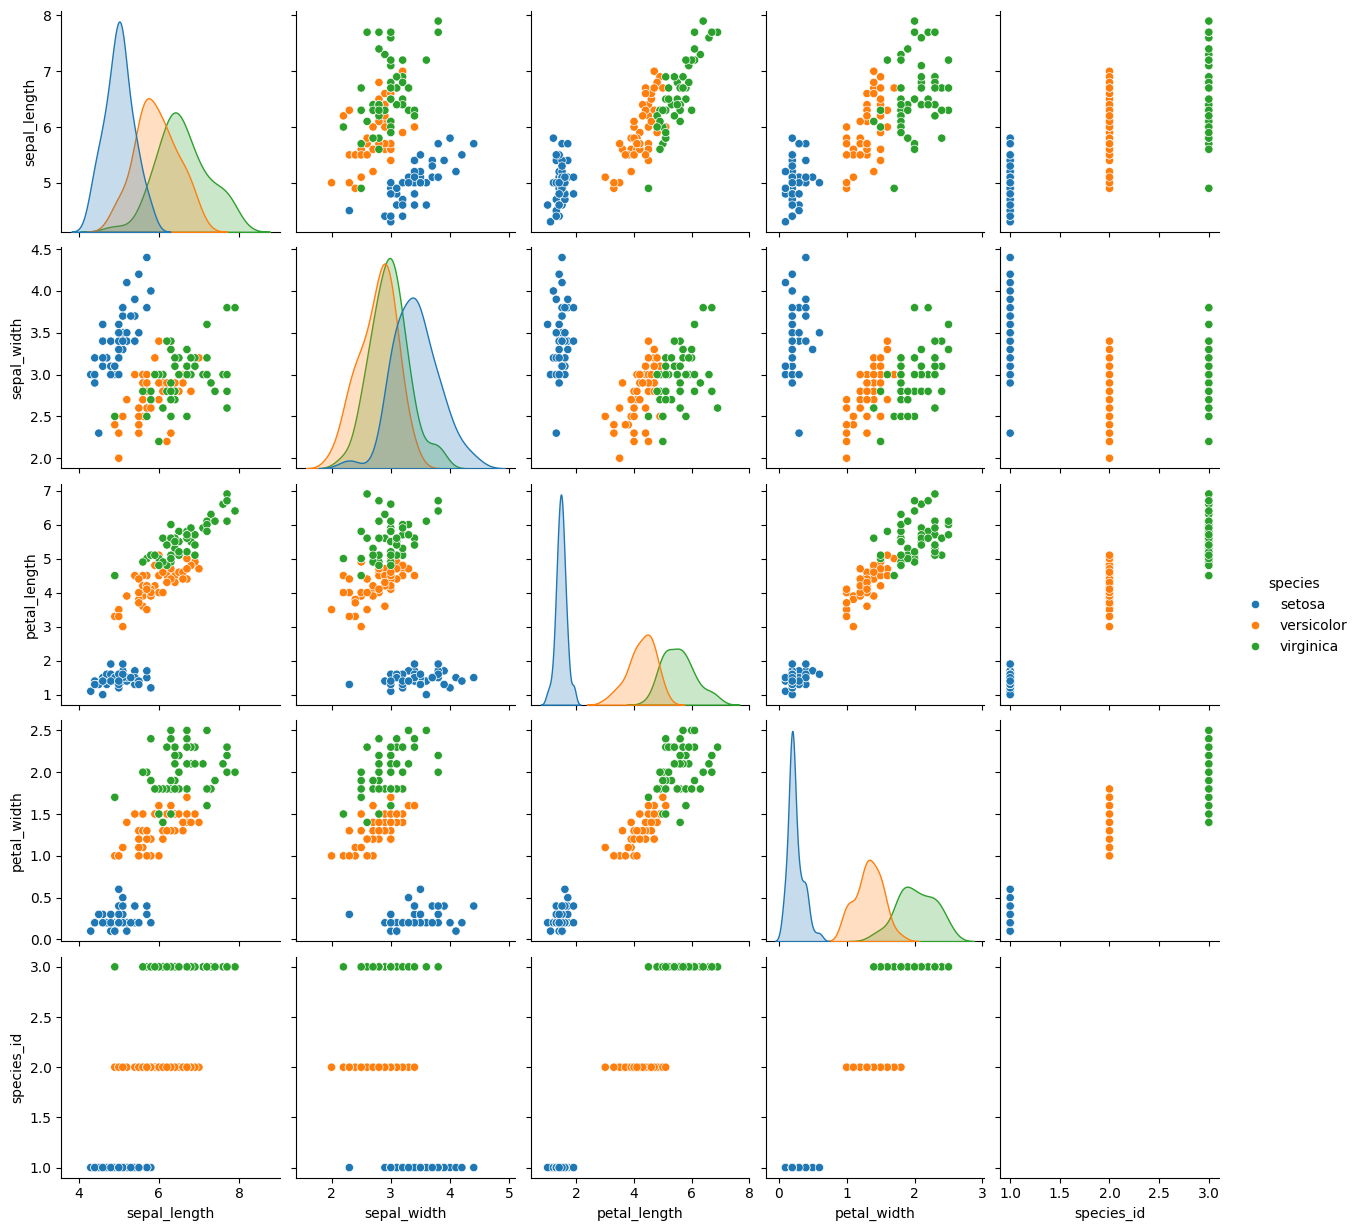

In [35]:
import seaborn as sns
sns.pairplot(df,hue='species')

# t-SNE 2D Projection of IRIS Dataset

In [36]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show()

# t-SNE 2D Projection of IRIS Dataset

In [44]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

#IRIS Dataset Projection using UMAP

In [33]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# Other Dimentionality Reduction Codes and Blogs that might help you

How to use t-SNE efficiently : https://distill.pub/2016/misread-tsne/

Visualizing MNIST : https://colah.github.io/posts/2014-10-Visualizing-MNIST/

Building PCA from scratch : https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/


